# Session 3 - P4D Simulations

Let's activate our previously created environment and import BattMo into the kernel.

In [2]:
using BattMo, GLMakie, Jutul
GLMakie.activate!(inline=false)

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter C:\Users\lorenah\.julia\packages\ProgressMeter\kniaW\src\ProgressMeter.jl:607
Progress 100%|███████████████████████████████████████████| Time: 0:00:50


╭────────────────┬───────────┬───────────────┬──────────╮
│ Iteration type │  Avg/step │  Avg/ministep │    Total │
│                │ 138 steps │ 138 ministeps │ (wasted) │
├────────────────┼───────────┼───────────────┼──────────┤
│ Newton         │   2.13043 │       2.13043 │  294 (0) │
│ Linearization  │   3.13043 │       3.13043 │  432 (0) │
│ Linear solver  │   2.13043 │       2.13043 │  294 (0) │
│ Precond apply  │       0.0 │           0.0 │    0 (0) │
╰────────────────┴───────────┴───────────────┴──────────╯
╭───────────────┬──────────┬────────────┬─────────╮
│ Timing type   │     Each │   Relative │   Total │
│               │       ms │ Percentage │       s │
├───────────────┼──────────┼────────────┼─────────┤
│ Properties    │   4.4188 │     2.90 % │  1.2991 │
│ Equations     │  29.6033 │    28.51 % │ 12.7886 │
│ Assembly      │  11.2702 │    10.85 % │  4.8687 │
│ Linear solve  │  31.1740 │    20.43 % │  9.1651 │
│ Linear setup  │   0.0000 │     0.00 % │  0.0000 │
│ Precond 

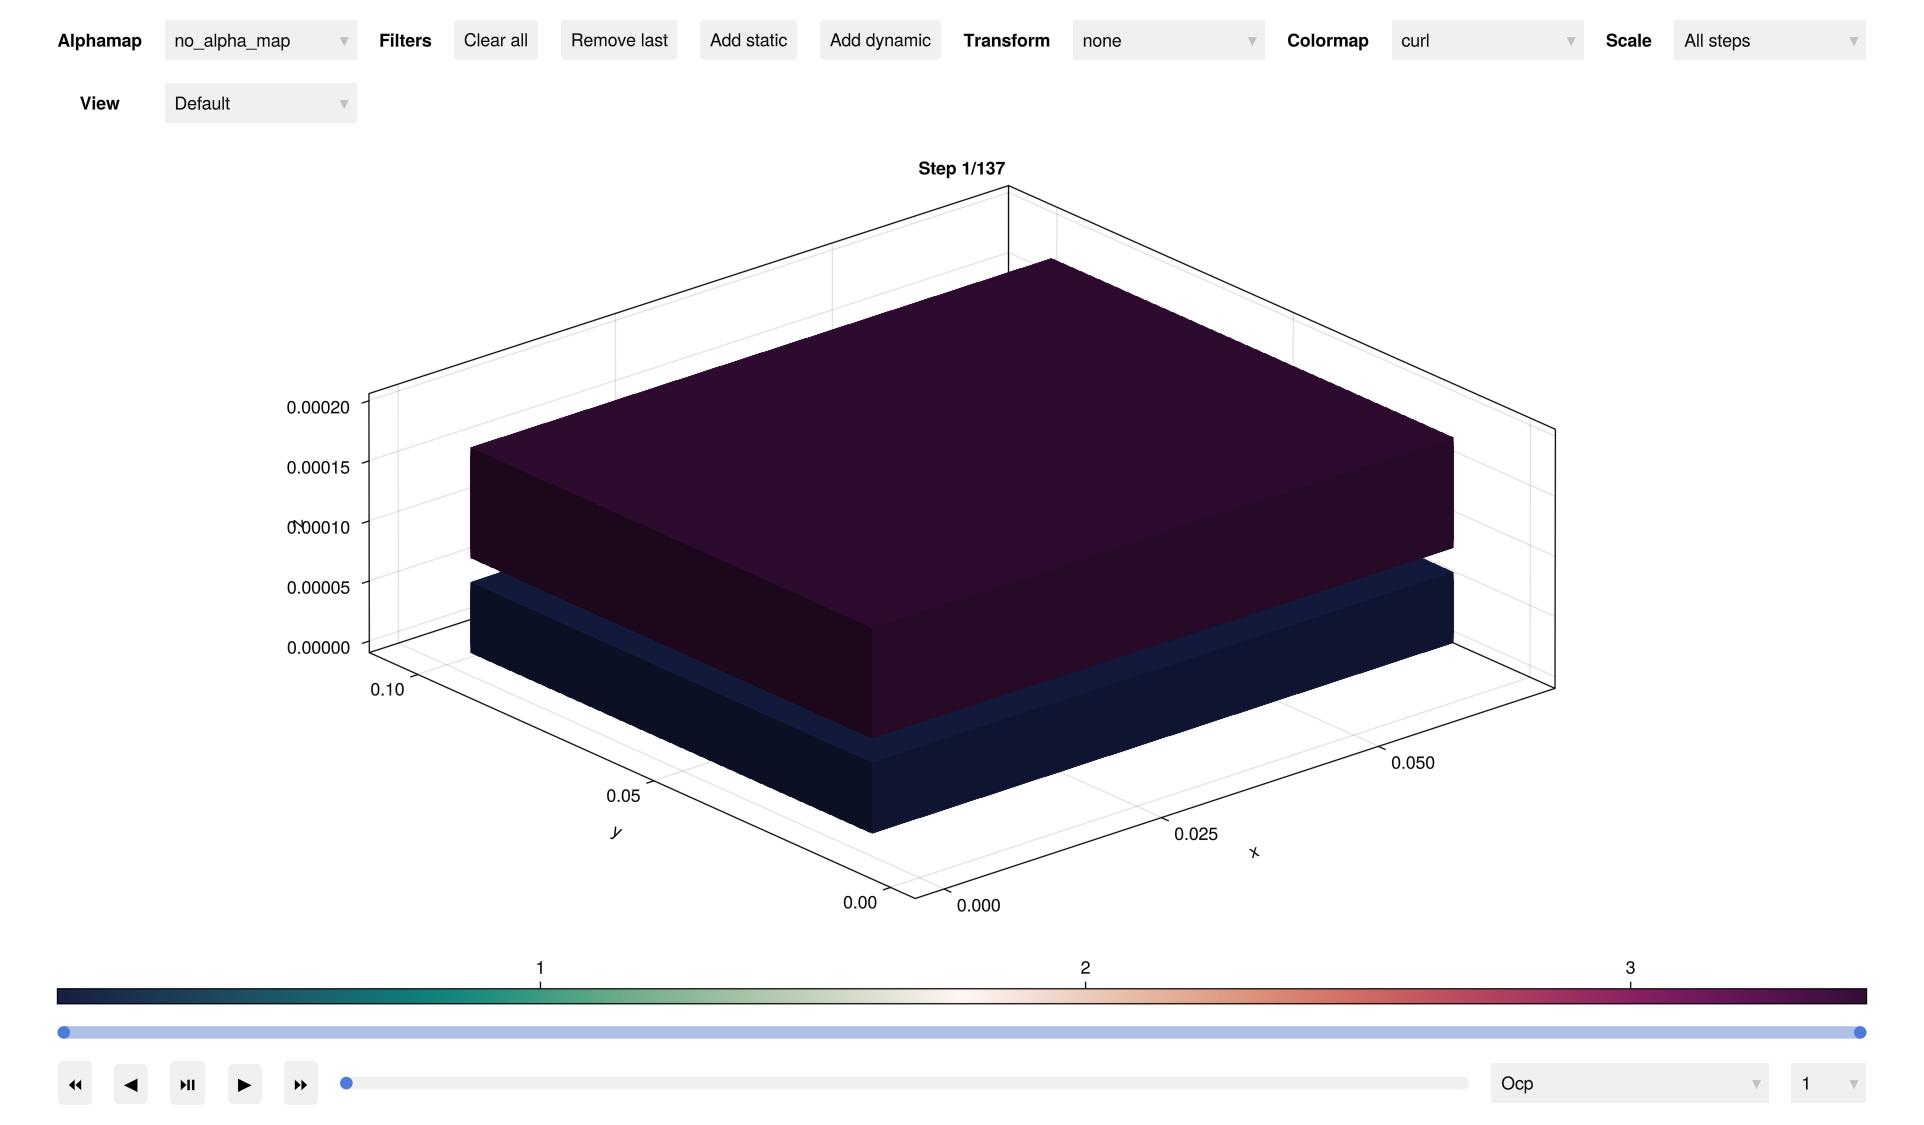

In [3]:
cell_parameters = load_cell_parameters(; from_default_set = "Xu2015")
cycling_protocol = load_cycling_protocol(; from_default_set = "CCDischarge")
model_settings = load_model_settings(; from_default_set = "P4D_pouch")
simulation_settings = load_simulation_settings(; from_default_set = "P4D_pouch")

model_setup = LithiumIonBattery(; model_settings)

sim = Simulation(model_setup, cell_parameters, cycling_protocol; simulation_settings);
output = solve(sim)

plot_interactive_3d(output; colormap = :curl)